In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/petition_sampled.csv')
print(data.shape)

(18077, 8)


In [3]:
data.head()

,article_id,start,end,answered,votes,category,title,content
0,58,2017-08-19,2017-11-17,0,21,일자리,국토교통부와 한국주택협회가 행한 부당한 행위와 권력남용에 대한 내용을 청원드립니다.,안녕하세요? 존경하고 지지하는 문재인 대통령님!\n저는 성남시 분당구 정자동 주택전...
1,63,2017-08-20,2017-09-04,0,1,보건복지,살려주세요..,안녕하십니까?\n저는 올해 63세된 홀로 사는 늙은 여자입니다...\n작년 중복날 ...
2,136,2017-08-20,2017-11-18,0,4,육아/교육,고등학교 교육 내용 수준을 낮춰주시고 실용적인 내용을 담아주세요!,저는 광주에 사는 중3 학생입니다. 고등학교 가기 직전의 학년이라 어느 때보다 고등...
3,141,2017-08-20,2017-08-27,0,0,기타,한국문화에 창조적요소를 심자,안녕하십니까\n저는 92년 한국을 알게된 종국동포 입니다.\n[저는 한 중소기업에...
4,148,2017-08-20,2017-11-18,0,7,외교/통일/국방,다문화정책 및 할랄 인증 제도,대한민국과 국민을 위해 밤낮 없이 수고하시는 대통령을 비롯한 위정자 분들께\n대한민...


In [12]:
data['category'].value_counts()

정치개혁           2845
기타             2189
인권/성평등         1611
안전/환경          1350
외교/통일/국방       1262
교통/건축/국토       1262
육아/교육          1219
보건복지           1142
일자리            1030
행정              944
문화/예술/체육/언론     886
미래              821
경제민주화           753
성장동력            311
저출산/고령화대책       192
반려동물            177
농산어촌             83
Name: category, dtype: int64

In [5]:
data = data.loc[data['category'].isin(['문화/예술/체육/언론','외교/통일/국방','반려동물','인권/성평등']),:].reset_index(drop=True)
print(data.shape)

(3936, 8)


# preprocessing

In [6]:
data['content'][0]

'대한민국과 국민을 위해 밤낮 없이 수고하시는 대통령을 비롯한 위정자 분들께\\n대한민국의 헌법 수호와 국민의 안전을 위협하고 있는 이슬람권의 영향에 대해 국가와 민족을 위해 지혜롭게 다문화 정책을 펼쳐 주셨으면 합니다.\\n내년 평창 올림픽 때 이슬람권 관광객을 위해 국민의 혈세로 돼지고기 대신 식감이 비슷한 두부와 표고버섯으로 음식의 재료를 대체해 만든다는 기사를 보았는데 매우 이해가 되지 않습니다. 그 이유는 국민의 혈세를 왜 그들의 식단에 맞추어서 낭비를 해야 하는 지요. 한국은 관광 국가가 아닙니다. 그리고 솔직히 외국인들이 많이 몰려오지 않아도 대한민국이 그리 어렵게 살아가지 않을 정도의 경제력이 있는 나라입니다.\\n왜 굳이 그들이 한국이 좋아서 방문을 했는데 그들의 문화에 따라 할랄 인증 제도를  허가해서 시행을 하려고 하는지요. 할랄 인증 제도는 수시로 이맘(이슬람 성직자)에 의해  먹을 수 있는 것과 없는 것을 바꾸며 또한 인증에 대한 조건도 매우 까다롭습니다. 따라서 대한민국과 기업의 입장에서 보았을 때 큰 경제적 소득이 없습니다.\\n그럼에도 메스컴에서는 그들의 경제력을 보고 이슬람을 미화하는 방송을 하고 있습니다. 특히 그들의 경전인 꾸란(코란)을 보면 자신들의 세력을 넓이거나, 무함마드(이슬람교에서 최고로 여기는 선지자)을 위해서는 거짓말과 살인을 해도 좋다는 교리(타끼야)가 기록되어 있습니다. 그래서 그들은 이 교리에 따라 순교의 각오로 테러를 죄의식 없이 아무렇지 않게 행합니다.\\n물론 일부 극단주의 무슬림이라고 주장할 수도 있습니다. 하지만 광의적으로 보면 이들은 종교라는 가면을 쓰고 있는 외람되게 말씀 드리면 테러 집단과 같습니다. 따라서 대한민국도 이제는 안전지대가 아닙니다. 그 이유는 작금의 일부 아랍 소식 통에 의하면 대한민국은 매우 살기 좋은 나라이기에 이슬람화를 위해서는 할랄인증제도와 결혼과 노동자 입국을 통해 포교를 적극적으로 해야 한다고 합니다.\\n한 예를 들면 선교사 비자로 들어와 있는 “이맘”중에 샤리아 법(

In [27]:
import re

def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
    # text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    text = text.replace('  ',' ')
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
    # text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    return text

In [28]:
data['regex_content'] = data['content'].apply(preprocessing)
data['regex_content'][0]

'대한민국과 국민을 위해 밤낮 없이 수고하시는 대통령을 비롯한 위정자 분들께 대한민국의 헌법 수호와 국민의 안전을 위협하고 있는 이슬람권의 영향에 대해 국가와 민족을 위해 지혜롭게 다문화 정책을 펼쳐 주셨으면 합니다 내년 평창 올림픽 때 이슬람권 관광객을 위해 국민의 혈세로 돼지고기 대신 식감이 비슷한 두부와 표고버섯으로 음식의 재료를 대체해 만든다는 기사를 보았는데 매우 이해가 되지 않습니다 그 이유는 국민의 혈세를 왜 그들의 식단에 맞추어서 낭비를 해야 하는 지요 한국은 관광 국가가 아닙니다 그리고 솔직히 외국인들이 많이 몰려오지 않아도 대한민국이 그리 어렵게 살아가지 않을 정도의 경제력이 있는 나라입니다 왜 굳이 그들이 한국이 좋아서 방문을 했는데 그들의 문화에 따라 할랄 인증 제도를 허가해서 시행을 하려고 하는지요 할랄 인증 제도는 수시로 이맘 이슬람 성직자 에 의해 먹을 수 있는 것과 없는 것을 바꾸며 또한 인증에 대한 조건도 매우 까다롭습니다 따라서 대한민국과 기업의 입장에서 보았을 때 큰 경제적 소득이 없습니다 그럼에도 메스컴에서는 그들의 경제력을 보고 이슬람을 미화하는 방송을 하고 있습니다 특히 그들의 경전인 꾸란 코란 을 보면 자신들의 세력을 넓이거나 무함마드 이슬람교에서 최고로 여기는 선지자 을 위해서는 거짓말과 살인을 해도 좋다는 교리 타끼야 가 기록되어 있습니다 그래서 그들은 이 교리에 따라 순교의 각오로 테러를 죄의식 없이 아무렇지 않게 행합니다 물론 일부 극단주의 무슬림이라고 주장할 수도 있습니다 하지만 광의적으로 보면 이들은 종교라는 가면을 쓰고 있는 외람되게 말씀 드리면 테러 집단과 같습니다 따라서 대한민국도 이제는 안전지대가 아닙니다 그 이유는 작금의 일부 아랍 소식 통에 의하면 대한민국은 매우 살기 좋은 나라이기에 이슬람화를 위해서는 할랄인증제도와 결혼과 노동자 입국을 통해 포교를 적극적으로 해야 한다고 합니다 한 예를 들면 선교사 비자로 들어와 있는 이맘 중에 샤리아 법 개인의 전후 사정을 고려하지 않으며 소수의 의견을 무시하

In [ ]:
# stops = ['있는', '있습니다',  '년도', '에', '합니다', 
#          '하는', '및', '하고',  '대한',  
#          '그리고','저는', '없는', '것입니다', 
#          '많은', '이런', '것은', '왜', '같은', 
#          '없습니다', '위해', '한다']


# def remove_stopword(text):
#     meaningful_words = [w for w in text if not w in stops]
#     return ''.join(meaningful_words)

In [32]:
from konlpy.tag import Okt

tokenizer = Okt()

def token(x):
    result = tokenizer.morphs(x)
    return ' '.join(result)

data['regex_token_content'] = data['regex_content'].map(token)
data['regex_token_content'][0]

'대한민국 과 국민 을 위해 밤낮 없이 수고 하시는 대통령 을 비롯 한 위정 자 분 들 께 대한민국 의 헌법 수호 와 국민 의 안전 을 위협 하고 있는 이슬람권 의 영향 에 대해 국가 와 민족 을 위해 지혜롭 게 다문화 정책 을 펼쳐 주셨으면 합니다 내년 평창 올림픽 때 이슬람권 관광객 을 위해 국민 의 혈 세로 돼지고기 대신 식감 이 비슷한 두부 와 표고버섯 으로 음식 의 재료 를 대체 해 만든다는 기사 를 보았는데 매우 이해 가 되지 않습니다 그 이유 는 국민 의 혈세 를 왜 그 들 의 식단 에 맞추어서 낭비 를 해야 하는 지요 한국 은 관광 국가 가 아닙니다 그리고 솔직히 외국인 들 이 많이 몰려오지 않아도 대한민국 이 그리 어렵게 살아가지 않을 정도 의 경제력 이 있는 나라 입니다 왜 굳이 그 들 이 한국 이 좋아서 방문 을 했는데 그 들 의 문화 에 따라 할랄 인증 제도 를 허가 해서 시행 을 하려고 하는지요 할랄 인증 제도 는 수시로 이맘 이슬람 성직자 에 의해 먹을 수 있는 것 과 없는 것 을 바꾸며 또한 인증 에 대한 조건 도 매우 까다롭습니다 따라서 대한민국 과 기업 의 입장 에서 보았을 때 큰 경제 적 소득 이 없습니다 그럼에도 메스 컴 에서는 그 들 의 경제력 을 보고 이슬람 을 미화 하는 방송 을 하고 있습니다 특히 그 들 의 경전 인 꾸란 코란 을 보면 자신 들 의 세력 을 넓이거나 무함마드 이슬람교 에서 최고 로 여기는 선지자 을 위 해서는 거짓말 과 살인 을 해도 좋다는 교리 타 끼 야 가 기록 되어 있습니다 그래서 그 들 은 이 교리 에 따라 순교 의 각오 로 테러 를 죄 의식 없이 아무렇지 않게 행 합니다 물론 일부 극단 주의 무슬림 이라고 주장 할 수도 있습니다 하지만 광 의적 으로 보면 이 들 은 종교 라는 가면 을 쓰고 있는 외람 되게 말씀 드리면 테러 집단 과 같습니다 따라서 대한민국 도 이제 는 안전지대 가 아닙니다 그 이유 는 작 금 의 일부 아랍 소식 통 에 의하면 대한민국 은 매우 살기 좋은 나라이기에 이슬람 화 를

# word2vec

In [39]:
from gensim.models import Word2Vec

In [37]:
for doc in data['regex_token_content']:
    print(doc.split())
    break

['대한민국', '과', '국민', '을', '위해', '밤낮', '없이', '수고', '하시는', '대통령', '을', '비롯', '한', '위정', '자', '분', '들', '께', '대한민국', '의', '헌법', '수호', '와', '국민', '의', '안전', '을', '위협', '하고', '있는', '이슬람권', '의', '영향', '에', '대해', '국가', '와', '민족', '을', '위해', '지혜롭', '게', '다문화', '정책', '을', '펼쳐', '주셨으면', '합니다', '내년', '평창', '올림픽', '때', '이슬람권', '관광객', '을', '위해', '국민', '의', '혈', '세로', '돼지고기', '대신', '식감', '이', '비슷한', '두부', '와', '표고버섯', '으로', '음식', '의', '재료', '를', '대체', '해', '만든다는', '기사', '를', '보았는데', '매우', '이해', '가', '되지', '않습니다', '그', '이유', '는', '국민', '의', '혈세', '를', '왜', '그', '들', '의', '식단', '에', '맞추어서', '낭비', '를', '해야', '하는', '지요', '한국', '은', '관광', '국가', '가', '아닙니다', '그리고', '솔직히', '외국인', '들', '이', '많이', '몰려오지', '않아도', '대한민국', '이', '그리', '어렵게', '살아가지', '않을', '정도', '의', '경제력', '이', '있는', '나라', '입니다', '왜', '굳이', '그', '들', '이', '한국', '이', '좋아서', '방문', '을', '했는데', '그', '들', '의', '문화', '에', '따라', '할랄', '인증', '제도', '를', '허가', '해서', '시행', '을', '하려고', '하는지요', '할랄', '인증', '제도', '는', '수시로', '이맘', '이슬람', '성직자', '에', '의해', '먹을'

In [41]:
class Word2VecCorpus:
    def __init__(self, data):
        self.data = data
    def __iter__(self):
        for doc in self.data:
            yield doc.split()

In [42]:
Word2Vec_Corpus = Word2VecCorpus(data['regex_token_content'])

word2vec_model = Word2Vec(
    Word2Vec_Corpus,
    size=100, # embedding size
    alpha=0.025,
    window=5,
    min_count=5,
    sg=0,
    negative=5 # negative sampling
) 

In [43]:
print(f'How many words : {len(word2vec_model.wv.vocab)}')

How many words : 11757


In [44]:
word2vec_model.wv['안전']

array([-0.11703659, -0.06460966, -0.28601134,  0.35580125, -0.24021357,
       -0.38383335,  0.57619464, -0.0405412 , -0.11301681, -0.23801997,
       -0.10375569, -0.22601871, -0.24325652, -0.434127  ,  0.06246083,
       -0.12427328, -0.02769409,  0.41148084, -0.170422  , -0.68872267,
       -0.5896065 ,  0.6345707 , -0.45764074,  0.11434854, -0.12077968,
        0.12012338, -0.44202605,  0.5059626 ,  0.70924675, -0.28664246,
        0.24168281, -0.12916818, -0.22891124, -0.51719743,  0.07014868,
       -0.40662888,  0.23472421,  0.09249193, -0.21331468,  0.4078557 ,
       -0.45205978,  0.13909595,  0.42279792, -0.36546415,  0.18618788,
        1.0062598 , -0.44055143, -0.12225967,  0.00509861,  0.38251376,
        0.22080323,  0.11509591, -0.1347812 , -0.70836884,  0.2835427 ,
       -0.33406007, -0.6600139 ,  0.20042889,  0.27577806,  0.06357234,
       -0.3622659 ,  0.20031151, -0.24335675,  0.2515351 ,  0.25705117,
        0.26278138,  0.32548982, -0.08270358,  0.2778628 , -0.14

In [49]:
word2vec_model.wv.most_similar('안전', topn=10)

[('기본권', 0.9580826759338379),
 ('사생활', 0.9537778496742249),
 ('다양성', 0.9382153749465942),
 ('고충', 0.9342435598373413),
 ('존엄', 0.9191291928291321),
 ('교칙', 0.9162411093711853),
 ('이익', 0.9074028730392456),
 ('유린', 0.9035308361053467),
 ('일종', 0.9014430046081543),
 ('남용', 0.8978136777877808)]

In [52]:
word2vec_model.wv.most_similar(positive=['인권'], negative=['여자'])

[('보장', 0.5694025158882141),
 ('하여', 0.5616177320480347),
 ('하기', 0.5600206255912781),
 ('과', 0.5297419428825378),
 ('위', 0.5196051001548767),
 ('지원', 0.5053569674491882),
 ('위해', 0.5027866363525391),
 ('가할', 0.5005291104316711),
 ('정책', 0.4992450773715973),
 ('대한', 0.4941250681877136)]

In [55]:
word2vec_model.wv.similarity('인권', '아이')

0.5250484

# Doc2vec

In [74]:
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [65]:
for doc_idx in range(len(data)):
    article_idx, text = data.loc[doc_idx,'article_id'], data.loc[doc_idx,'regex_token_content']
    print(TaggedDocument(
        words = text.split(), 
        tags = [article_idx]))
    break

TaggedDocument(['대한민국', '과', '국민', '을', '위해', '밤낮', '없이', '수고', '하시는', '대통령', '을', '비롯', '한', '위정', '자', '분', '들', '께', '대한민국', '의', '헌법', '수호', '와', '국민', '의', '안전', '을', '위협', '하고', '있는', '이슬람권', '의', '영향', '에', '대해', '국가', '와', '민족', '을', '위해', '지혜롭', '게', '다문화', '정책', '을', '펼쳐', '주셨으면', '합니다', '내년', '평창', '올림픽', '때', '이슬람권', '관광객', '을', '위해', '국민', '의', '혈', '세로', '돼지고기', '대신', '식감', '이', '비슷한', '두부', '와', '표고버섯', '으로', '음식', '의', '재료', '를', '대체', '해', '만든다는', '기사', '를', '보았는데', '매우', '이해', '가', '되지', '않습니다', '그', '이유', '는', '국민', '의', '혈세', '를', '왜', '그', '들', '의', '식단', '에', '맞추어서', '낭비', '를', '해야', '하는', '지요', '한국', '은', '관광', '국가', '가', '아닙니다', '그리고', '솔직히', '외국인', '들', '이', '많이', '몰려오지', '않아도', '대한민국', '이', '그리', '어렵게', '살아가지', '않을', '정도', '의', '경제력', '이', '있는', '나라', '입니다', '왜', '굳이', '그', '들', '이', '한국', '이', '좋아서', '방문', '을', '했는데', '그', '들', '의', '문화', '에', '따라', '할랄', '인증', '제도', '를', '허가', '해서', '시행', '을', '하려고', '하는지요', '할랄', '인증', '제도', '는', '수시로', '이맘', '이슬람', '성직자', 

In [97]:
class Doc2VecCorpus:
    def __init__(self, data):
        self.data = data
    def __iter__(self):
        for doc_idx in range(len(self.data)):
            article_idx, text = self.data.loc[doc_idx,'article_id'], self.data.loc[doc_idx,'regex_token_content']
            yield TaggedDocument(
                words = text.split(), 
                tags = ['article'+str(article_idx)])

Doc2Vec_Corpus = Doc2VecCorpus(data.loc[:,['article_id','regex_token_content']])

In [98]:
doc2vec_model = Doc2Vec(Doc2Vec_Corpus) # argument is similar with Word2Vec

In [104]:
doc2vec_model.docvecs.most_similar('article50892')

[('article152946', 0.9674394726753235),
 ('article125649', 0.966988205909729),
 ('article159933', 0.9631720781326294),
 ('article287880', 0.9626004695892334),
 ('article284729', 0.9610036015510559),
 ('article64591', 0.9607391357421875),
 ('article293509', 0.9600608944892883),
 ('article25069', 0.9596847295761108),
 ('article106714', 0.9587509632110596),
 ('article128256', 0.958486020565033)]

In [188]:
data.loc[data['article_id']==50892]

,article_id,start,end,answered,votes,category,title,content,regex_content,regex_token_content
512,50892,2017-11-25,2017-12-25,0,3,인권/성평등,이국종 아주대병원 중증외상센터에 대한 지원확충을 청원합니다.,인간의 생명은\n천부적 인권입니다~!!\n생명을 살리는 최전선의 의료행위터인\n이...,인간의 생명은 천부적 인권입니다 생명을 살리는 최전선의 의료행위터인 이국종 아주대...,인간 의 생명 은 천 부적 인권 입니다 생명 을 살리는 최전선 의 의료행위 터 인 ...


In [189]:
data.loc[data['article_id']==152946]

,article_id,start,end,answered,votes,category,title,content,regex_content,regex_token_content
1415,152946,2018-02-27,2018-03-29,0,1,인권/성평등,위안부 할머니들과 비슷한 연령대의 어르신들에게 살었던 지역에서 격었던 일제시대 위안...,일제시대 전국적으로 위안부 강제동원이 이루어 졌습니다.\n그러나 그 직접적인 증거가...,일제시대 전국적으로 위안부 강제동원이 이루어 졌습니다 그러나 그 직접적인 증거가 아...,일제시대 전국 적 으로 위안부 강제 동원 이 이루어 졌습니다 그러나 그 직접 적 인...


In [115]:
article_id = []
vec = []
for idx in data['article_id']:
    article_id.append(idx)
    vec.append(doc2vec_model.docvecs['article'+str(idx)])
    
doc2vec_df = pd.DataFrame(vec)
doc2vec_df['article_id'] = article_id

In [123]:
final_df = pd.merge(doc2vec_df, data.loc[:,['article_id','category']], on='article_id')

In [124]:
final_df.shape

(3936, 102)

# Doc2VEc 2차원

In [125]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

In [129]:
X = final_df.iloc[:,:-2]
X_tsne = tsne.fit_transform(X)

In [130]:
X_tsne.shape

(3936, 2)

In [139]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# col = encoder.fit_transform(final_df['category'])

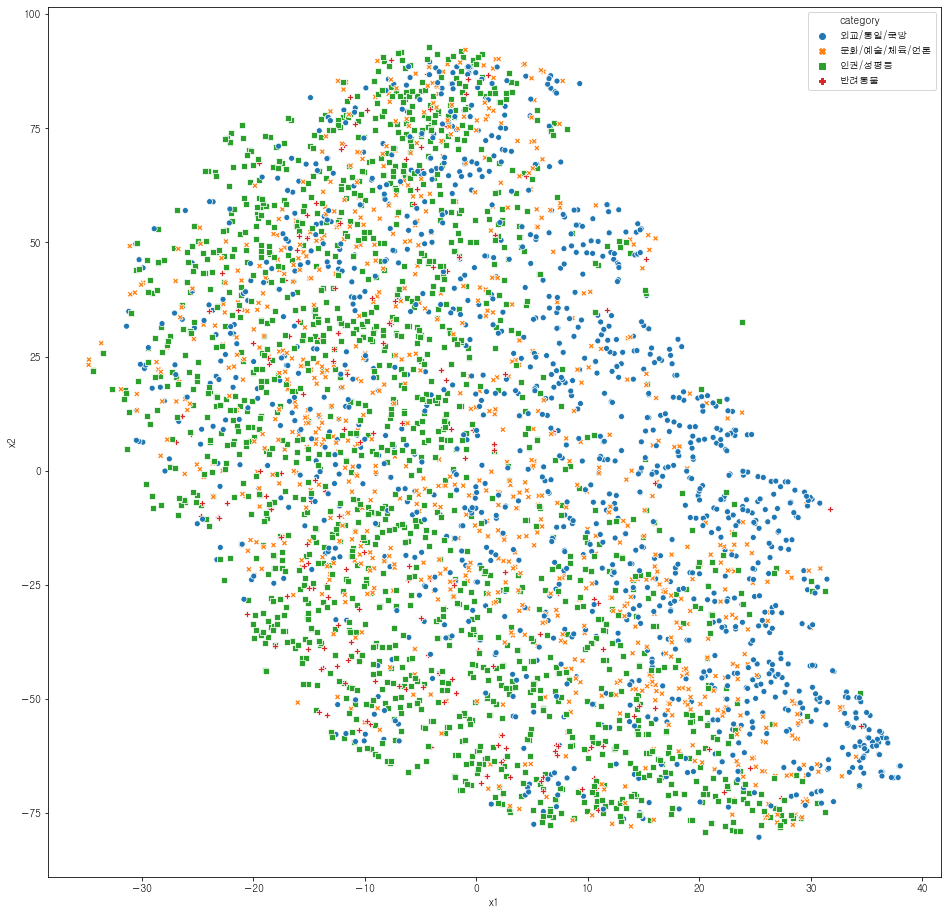

In [180]:
import seaborn as sns
plt.rc('font', family='gulim') # For Windows

for_viz = pd.DataFrame(X_tsne, columns=['x1','x2'])
for_viz['category']=final_df['category']

plt.figure(figsize=(16,16))
sns.scatterplot(x='x1',
                y='x2', 
                hue='category',
                style='category',
                data=for_viz)
plt.show()